In [22]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import graphviz
import pydot
import pydotplus
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

#enable eager execution, calculates tensors as they occur in code, evaluates operations immediately
tf.compat.v1.enable_eager_execution()

In [23]:
#X Data
with open('X_class.pkl','rb') as f:
    X = pickle.load(f)
    print(len(X))
    
#Y Data
with open('Y_class.pkl','rb') as f:
    Y = pickle.load(f)
    print(len(Y))

907
907


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [25]:
def Scaler(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = []
    X_test_scaled = []
    for i in range(len(X_train)):
        scaler.fit(X_train[i])
        X_train_scaled.append(scaler.transform(X_train[i]))
    for i in range(len(X_test)):
        X_test_scaled.append(scaler.transform(X_test[i]))
    return np.array(X_train_scaled), np.array(X_test_scaled)

In [26]:
X_train_scaled, X_test_scaled = Scaler(X_train, X_test)
print("X Train Shape: ", X_train_scaled.shape)
print("X Test Shape: ", X_test_scaled.shape)
print("Number of features: ", len(X[0]))
print("Number of observations: ", len(X[0][0]))

X Train Shape:  (680, 3618, 12)
X Test Shape:  (227, 3618, 12)
Number of features:  3618
Number of observations:  12


In [27]:
X_train_scaled.shape

(680, 3618, 12)

In [28]:
y_format = []
for i in range(680):
    y_format.append(y_train[i].todense())
y_train_array = np.array(y_format)
y_train_array = y_train_array.reshape(680, 18)
y_train_array.shape

(680, 18)

In [29]:
y_format_test = []
for i in range(227):
    y_format_test.append(y_test[i].todense())
y_test_array = np.array(y_format_test)
y_test_array = y_test_array.reshape(227, 18)
y_test_array.shape

(227, 18)

In [30]:
model = Sequential()
model.add(LSTM(2, activation='relu', input_shape=(3618, 12)))
model.add(Dense(18, activation="softmax")) #softmax for classification
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 2)                 120       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                54        
Total params: 174
Trainable params: 174
Non-trainable params: 0
_________________________________________________________________


In [31]:
history1 = model.fit(X_train_scaled, y_train_array, epochs=10, batch_size=5,verbose=1)

Epoch 1/10
136/136 [==============================] - 115s 844ms/step - loss: 2.8764 - accuracy: 0.0588
Epoch 2/10
136/136 [==============================] - 118s 865ms/step - loss: 2.7833 - accuracy: 0.0662
Epoch 3/10
136/136 [==============================] - 103s 761ms/step - loss: 2.7153 - accuracy: 0.1221
Epoch 4/10
136/136 [==============================] - 110s 810ms/step - loss: 2.6397 - accuracy: 0.1529
Epoch 5/10
136/136 [==============================] - 116s 854ms/step - loss: 2.5833 - accuracy: 0.1676
Epoch 6/10
136/136 [==============================] - 110s 807ms/step - loss: 2.5422 - accuracy: 0.1765
Epoch 7/10
136/136 [==============================] - 104s 765ms/step - loss: 2.5230 - accuracy: 0.1897
Epoch 8/10
136/136 [==============================] - 112s 824ms/step - loss: 2.4895 - accuracy: 0.1779
Epoch 9/10
136/136 [==============================] - 111s 819ms/step - loss: 2.4813 - accuracy: 0.1941
Epoch 10/10
136/136 [==============================] - 111s 817m

In [34]:
results = model.evaluate(X_test_scaled, y_test_array, batch_size=128)

2/2 [==============================] - 0s 123ms/step - loss: 3.6680 - accuracy: 0.0617


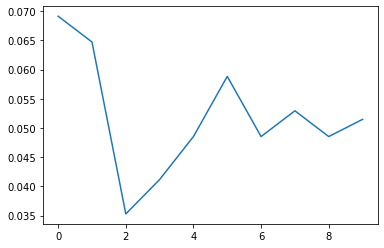

In [172]:
plt.plot(history1.history['accuracy']);

In [2]:
model2 = Sequential()
model2.add(LSTM(128, activation='relu', input_shape=(3618, 12), return_sequences=True))
model2.add(LSTM(256, activation='relu', return_sequences=True))
model2.add(LSTM(64, activation='relu'))
model2.add(Dense(18, activation="softmax")) #softmax for classification
opt = keras.optimizers.Adam(learning_rate=0.00001)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3618, 128)         72192     
_________________________________________________________________
lstm_1 (LSTM)                (None, 3618, 256)         394240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense (Dense)                (None, 18)                1170      
Total params: 549,778
Trainable params: 549,778
Non-trainable params: 0
_________________________________________________________________


In [214]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

history2 = model2.fit(X_train_scaled, y_train_array, epochs=50, batch_size=10,verbose=1, callbacks = [callback])

Epoch 1/50
68/68 [==============================] - 584s 9s/step - loss: 2.8909 - accuracy: 0.0588
Epoch 2/50
68/68 [==============================] - 504s 7s/step - loss: 2.8892 - accuracy: 0.0647
Epoch 3/50
68/68 [==============================] - 555s 8s/step - loss: 2.8877 - accuracy: 0.0676
Epoch 4/50
68/68 [==============================] - 490s 7s/step - loss: 2.8862 - accuracy: 0.0779
Epoch 5/50
68/68 [==============================] - 481s 7s/step - loss: 2.8848 - accuracy: 0.0926
Epoch 6/50
68/68 [==============================] - 510s 8s/step - loss: 2.8832 - accuracy: 0.0985
Epoch 7/50
68/68 [==============================] - 451s 7s/step - loss: 2.8816 - accuracy: 0.1162
Epoch 8/50
68/68 [==============================] - 473s 7s/step - loss: 2.8800 - accuracy: 0.1265
Epoch 9/50
68/68 [==============================] - 433s 6s/step - loss: 2.8783 - accuracy: 0.1309
Epoch 10/50
68/68 [==============================] - 430s 6s/step - loss: 2.8764 - accuracy: 0.1353
Epoch 11/

In [36]:
results2 = model2.evaluate(X_test_scaled, y_test_array, batch_size=128)

2/2 [==============================] - 11s 6s/step - loss: nan - accuracy: 0.0396


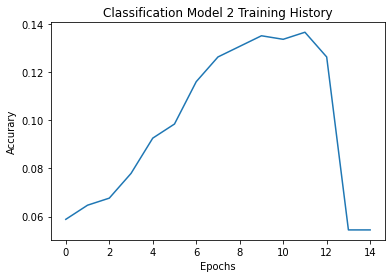

In [240]:
fig = plt.figure(figsize=(6, 4))
plt.plot(history2.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel('Accurary')
plt.title('Classification Model 2 Training History')
plt.savefig('class_model_history_accuracy.png')
plt.show();

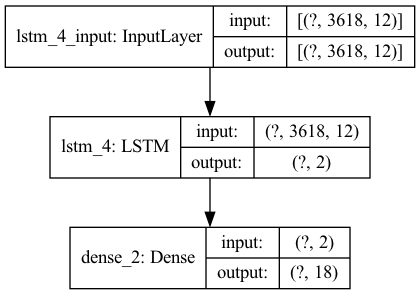

In [37]:
plot_model(model, to_file='model1_plot_class.png', show_shapes=True, show_layer_names=True)

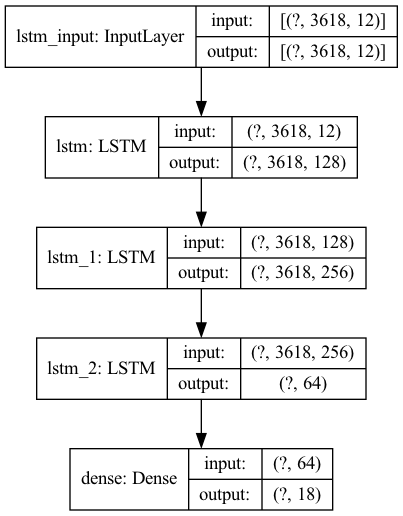

In [18]:
plot_model(model2, to_file='model2_plot_class.png', show_shapes=True, show_layer_names=True)

In [256]:
#X Classifier Data
with open('Class_Model_1_History.pkl','wb') as f:
    pickle.dump(history1.history, f)
    
#X Classifier Data
with open('Class_Model_2_History.pkl','wb') as f:
    pickle.dump(history2.history, f)

AttributeError: 'dict' object has no attribute 'history'

In [12]:
#Model 2 History
with open('Class_Model_2_History.pkl','rb') as f:
    history2 = pickle.load(f)
    print(len(history2))

2


In [209]:
model.evaluate(X_test_scaled, y_test_array)

8/8 [==============================] - 2s 197ms/step - loss: 3.0136 - accuracy: 0.0352


[3.0135557651519775, 0.035242289304733276]